In [1]:
# importing packages and modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize
from utils import *
from plotting_utils import *
import dglm_hmm1
from scipy.stats import multivariate_normal

In [2]:
# setting hyperparameters
S = 10 # sessions
T = 500 # trials per session
N = T * S # total data points
C = 2 # classes
K = 2 # states
D = 2 # features (sensory & bias)

In [3]:
# True Transition Matrix
trueP = np.zeros((2,2))
trueP[0,0]=0.97
trueP[0,1]=0.03
trueP[1,0]=.05
trueP[1,1]=.95
print("True Transition Matrix P")
print(trueP)

True Transition Matrix P
[[0.97 0.03]
 [0.05 0.95]]


Session indicies
[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]


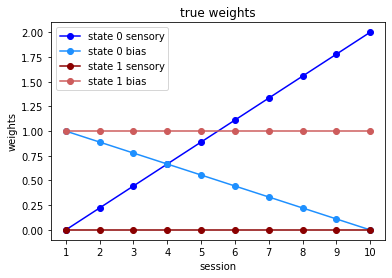

(5000, 2, 2, 2)


In [4]:
# True Weights and Session Start Indices
ourW = np.zeros((S,K,D))
ourW[:,0,1] = np.linspace(0,2,S) # state 1 sensory (increasing)
ourW[:,0,0] = np.linspace(1,0,S) # state 1 bias (decreasing)
ourW[:,1,1] = 0 # state 2 sensory (flat 0)
ourW[:,1,0] = 1 # state 2 bias (flat 1)
trueW = np.zeros((N,K,D,C))
# change weight format to have session*trials points
sessInd = []
for sess in range(0,S):
    sessInd.append(sess*T)
    for t in range(0,T):
        trueW[sess*T+t,:,:,0] = ourW[sess,:,:]
sessInd.append(N)
print("Session indicies")
print(sessInd)
plotting_weights(trueW,sessInd,'true weights')
print(trueW.shape)

In [5]:
# initialize object
dGLM_HMM = dglm_hmm1.dGLM_HMM1(N,K,D,C)

In [6]:
# simualating data from true weight and transition matrices
simX, simY, simZ = dGLM_HMM.simulate_data(trueW, trueP, sessInd)
simPhi = dGLM_HMM.observation_probability(simX, trueW)

In [7]:
alpha, ct, ll = dGLM_HMM.forward_pass(simY[2000:2500], trueP, simPhi[2000:2500,:,:])
beta = dGLM_HMM.backward_pass(simY[2000:2500,], trueP, simPhi[2000:2500,:,:], ct)
gamma, zeta = dGLM_HMM.posteriorLatents(simY[2000:2500], trueP, simPhi[2000:2500,:], alpha, beta, ct)
print(zeta)

[[[0.37574265 0.00762853]
  [0.04576937 0.57085945]]

 [[0.41503866 0.00647337]
  [0.05466833 0.52381964]]

 [[0.46229892 0.00740807]
  [0.04890048 0.48139253]]

 ...

 [[0.73304601 0.02128834]
  [0.01303901 0.23262663]]

 [[0.72413489 0.02195013]
  [0.01294045 0.24097453]]

 [[0.71746408 0.01961127]
  [0.01477746 0.2481472 ]]]


In [27]:
initP, initW = dGLM_HMM.generate_param(sessInd=sessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['normal', (0,1)])